<a href="https://colab.research.google.com/github/Sidhanth-Kafley/Sentiment-Analysis-towards-COVID-19-on-Twitter/blob/main/deep_learners_a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis towards COVID-19 on Twitter

---
COMP9444 Group Project

Group Name: Deep Learners

Mentor: Dipankar Srirag

Team

|Name | ID | Email|
|-----|----|------|
|Chenglong Wei|z5375926|chenglong.wei@student.unsw.edu.au|
|Ziyi Ding|z5610550|z5610550@ad.unsw.edu.au|
|Sidhanth Kafley|z5504979|z5504979@ad.unsw.edu.au|
|Yewei Huang|z5459400|z5459400@ad.unsw.edu.au|
|Gorjan Muratov|z5677486|z5677486@ad.unsw.edu.au|





# Introduction

The COVID-19 pandemic has sparked widespread discussion on social media platforms, particularly on Twitter. This project aims to analyze COVID-19-related tweets across different sentiments (positive, negative, or neutral) using natural language processing (NLP) techniques. Ultimately, trying to answer the question, “How can Deep Learning and Neural Networks be utilised to improve sentiment analysis of COVID-19 Tweets?”.  

Two approaches will be explored to attempt to answer this question from multiple aspects. Approach one will explore the effect Deep Learning has on sentiment analysis at the model building phase. Comparing the results between rule-based, machine learning, and deep learning models. The second approach will analyse the effect Neural Networks have on the embedding portion of the task. Evaluating the difference between frequency based and neural network based embedding approaches and the effect the different strategies have on sentiment analysis.

Tweets are short, informal, and have highly variable context yet hold much information within them that can be used to understand the stance society has towards a certain topic. During the COVID-19 pandemic, news and public awareness about the virus spread rapidly, much like the pandemic itself. Online opinions played a significant role in shaping public understanding. Analysing the sentiment of COVID-19-related tweets is important for stakeholders such as policymakers, crisis managers, and public health authorities as it gives them insights into how individuals perceive the pandemic.

# Setup

The following is the project setup. It includes the downloading of the Covid Sentiment dataset as well as all of the imports that are needed for the

In [ ]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

--2025-08-10 23:18:32--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2025-08-10 23:18:32--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2025-08-10 23:18:32--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [ap

In [ ]:
!git clone https://github.com/usmaann/COVIDSenti.git

!pip install vaderSentiment

!pip install gensim

Cloning into 'COVIDSenti'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20 (from 1)
Receiving objects: 100% (20/20), 4.78 MiB | 15.86 MiB/s, done.
Resolving deltas: 100% (8/8), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalle

In [ ]:
import re
import sys
from collections import Counter
from itertools import product

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from datasets import Dataset
from gensim.models import KeyedVectors, Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import (
    ENGLISH_STOP_WORDS,
    CountVectorizer,
    TfidfVectorizer,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from textblob import TextBlob
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as TorchDataset
from tqdm import tqdm

nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Pre-processing

The pre-processing for the task has been kept to a minimum. Labels are converted from strings to integers, tweets are lowered, and links are removed. This is intentionally done as the goal is to keep as much of the sentiment within the tweet as possible. Due to the character limit, tweets that undergo complex pre-processing have the power to drastically affect model performance, usually for the worse, as they may remove vital information. As a result, emojis, hashtags, and special characters have to be considered in depth before simply being removed. This project has chosen to keep all of these, as we deem them useful to our overall goal of understanding the sentiment of tweets.

Further down this notebook will be a variety of model training and evaluation. To standardise these processes, a training, testing, and validation split is established here, which will propagate throughout the notebook to establish consistency. The split chosen is 70% test, 20% validation, and 10% testing.

In [ ]:
df = pd.read_csv('/content/COVIDSenti/COVIDSenti.csv')

In [ ]:
def clean_df(df) -> pd.DataFrame:
  df['tweet'] = df['tweet'].str.replace(r'http\S+|www\.\S+', '', regex=True)
  df['tweet'] = df['tweet'].str.lower()
  label_map = {'neg': 0, 'neu': 1, 'pos': 2}
  df['label'] = df['label'].map(label_map)
  df = df.dropna(subset=['label'])
  df['label'] = df['label'].astype(int)
  return df

In [ ]:
cleaned_df = clean_df(df)

In [ ]:
cleaned_df.head()

,tweet,label
0,coronavirus | human coronavirus types | cdc,1
1,"@shehryar_taseer that‚äôs üíø true , \ncorona...",1
2,"tldr: not sars, possibly new coronavirus. diff...",0
3,disease outbreak news from the who: middle eas...,1
4,china - media: wsj says sources tell them myst...,1


To ensure standarisation the dataset was split into train, validation, and test sets in the 70:20:10 ratio respectively.

In [ ]:
# 70% train, 30% temp
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    cleaned_df["tweet"],
    cleaned_df["label"],
    test_size=0.3,
    stratify=cleaned_df["label"],
    random_state=42,
)
# 20% val, 10% test (from 30% temp)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=1 / 3, stratify=temp_labels, random_state=42
)

In [ ]:
def basic_tokenizer(text):
    return re.findall(r"\b\w+\b", text.lower())

In [ ]:
def basic_tokenizer2(text):
    return text.strip().split()

In [ ]:
all_tokens = [basic_tokenizer(t) for t in cleaned_df['tweet']]

# Data Source and Overview

The COVID sentiment dataset can be found at the following link: https://github.com/usmaann/COVIDSenti.git

The dataset consists of approximately 90,000 entries, where 74.9% are neutral, 18.2% are negative, and 7% are positive. It clearly exhibits a notable imbalance in the sentiment label distribution. Neutral sentiment accounts for the largest proportion, followed by negative and positive categories. Such a pronounced class imbalance, with substantial dominance of the neutral category, has the potential to introduce bias during model training and reduce the classifier’s ability to accurately predict minority classes. As a result of this metrics must not only be viewed at an average level but rather class by class to understand how the model truly performs.



Analysis of text feature distributions indicates that tweet lengths approximately follow a normal distribution. Median lengths across negative, neutral, and positive categories are relatively similar, and average lengths by label show a consistent pattern. It is fair to assume that the tweets are similar in this regard. Examination of social interaction features, particularly the density of user mentions, reveals that mention density is generally higher in negative and neutral tweets than in positive ones, suggesting differences in communication patterns across sentiment categories. High-frequency terms in the dataset are predominantly associated with the COVID-19 pandemic, including words directly referencing the virus. This concentration of pandemic-related vocabulary reflects the dataset’s strong thematic focus on discussions concerning COVID-19.



# Expolartory Data Analysis

# 1. Class Imbalance
**Purpose**: Show the total number of tweets and the class imbalance.



/tmp/ipython-input-2189114693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


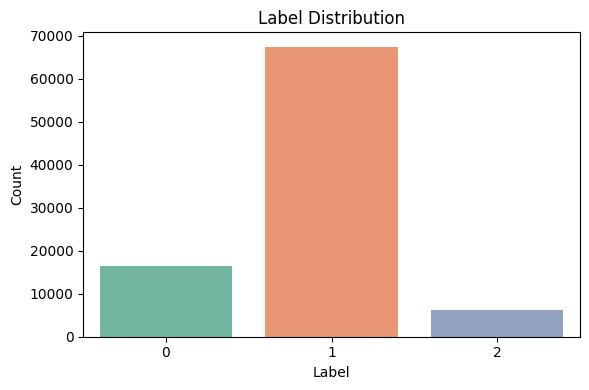

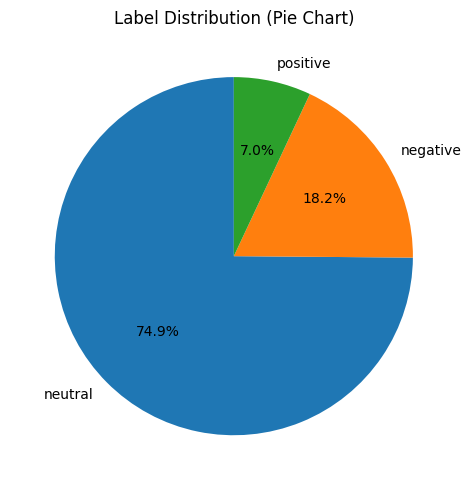

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Label Distribution (Count Plot)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 1.2 Label Proportions (Pie Chart)
plt.figure(figsize=(5,5))
df['label'].value_counts().plot(
    kind='pie',
    labels=['neutral','negative','positive'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Label Distribution (Pie Chart)')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Insight:

The dataset contains 90,000 tweets.

Class proportions: neutral ~75%, negative ~18%, positive ~7%, indicating significant imbalance.

# 2. Text Feature Distributions

###2.1 Tweet Length Distribution (Histogram)
Purpose: Visualize overall tweet length distribution and detect outliers.

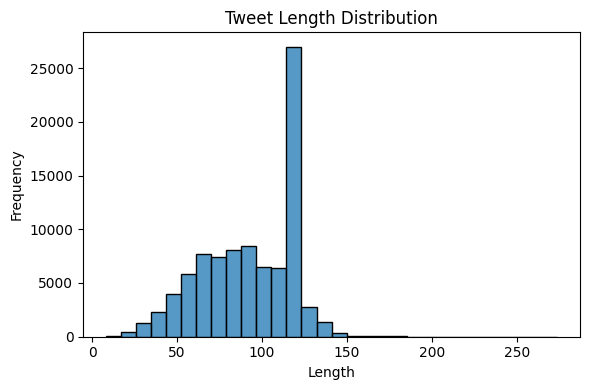

In [ ]:
# Compute tweet length
df['tweet_length'] = df['tweet'].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df['tweet_length'], bins=30, kde=False)
plt.title('Tweet Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Insight:

Tweet lengths approximate a normal distribution, peaking around 100 characters.

A few tweets approach the 280-character limit.

### 2.2 Tweet Length by Label (Box Plot)
Purpose: Compare length distributions across sentiment labels.

/tmp/ipython-input-702226167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='tweet_length', data=df, palette='pastel')


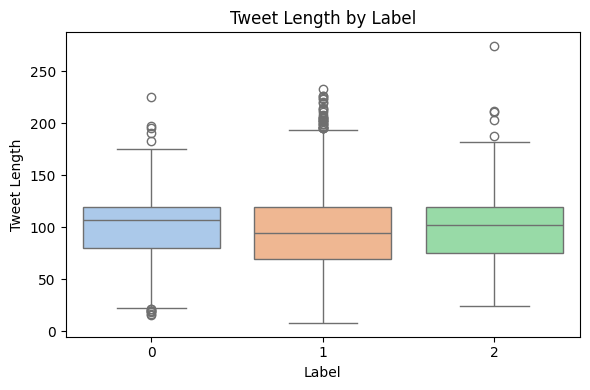

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='tweet_length', data=df, palette='pastel')
plt.title('Tweet Length by Label')
plt.xlabel('Label')
plt.ylabel('Tweet Length')
plt.tight_layout()
plt.show()


### Insight:

All classes have median lengths around 80–120 characters.

Negative tweets show more short outliers (around 50 characters), suggesting terseness in negative expression.

Neutral tweets exhibit longer tails, indicating some are very descriptive.

### 2.3 Average Tweet Length per Label (Bar Chart)
Purpose: Highlight mean length differences between labels.

/tmp/ipython-input-1527290336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='tweet_length', data=avg_length, palette='Set2')


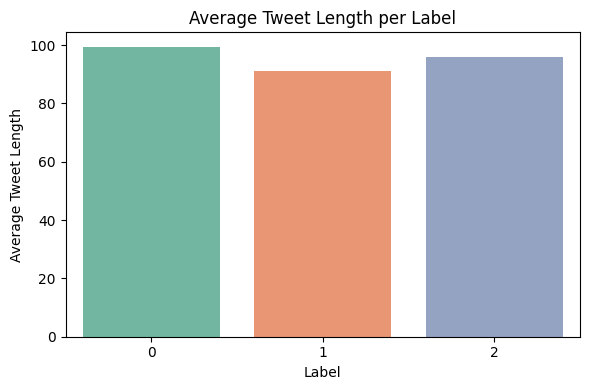

In [ ]:
avg_length = df.groupby('label')['tweet_length'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='label', y='tweet_length', data=avg_length, palette='Set2')
plt.title('Average Tweet Length per Label')
plt.xlabel('Label')
plt.ylabel('Average Tweet Length')
plt.tight_layout()
plt.show()


### Insight:

Negative tweets average \~93 characters, slightly shorter than neutral (\~105) and positive (\~107), reinforcing the brevity hypothesis.

#### 2.4 Social Element Density Analysis

/tmp/ipython-input-4032107116.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='mention_density', data=df, palette='pastel')


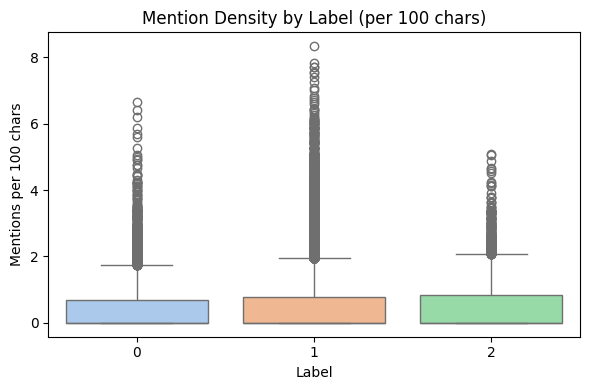

In [ ]:
import re

df['mention_count'] = df['tweet'].str.count(r'@\w+')

df['mention_density'] = df['mention_count'] / df['tweet_length'] * 100

plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='mention_density', data=df, palette='pastel')
plt.title('Mention Density by Label (per 100 chars)')
plt.xlabel('Label')
plt.ylabel('Mentions per 100 chars')
plt.tight_layout()
plt.show()

### Insight:  
Negative tweets show a higher mention density, possibly because users more frequently @ others when venting their emotions; the emoji density of positive tweets is significantly higher than that of other categories, indicating that positive emotions are more inclined to be expressed through emojis.

# 3. Word Frequency Analysis
Purpose: Identify the most common content words after removing stopwords.


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

/tmp/ipython-input-569516536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='Set3')


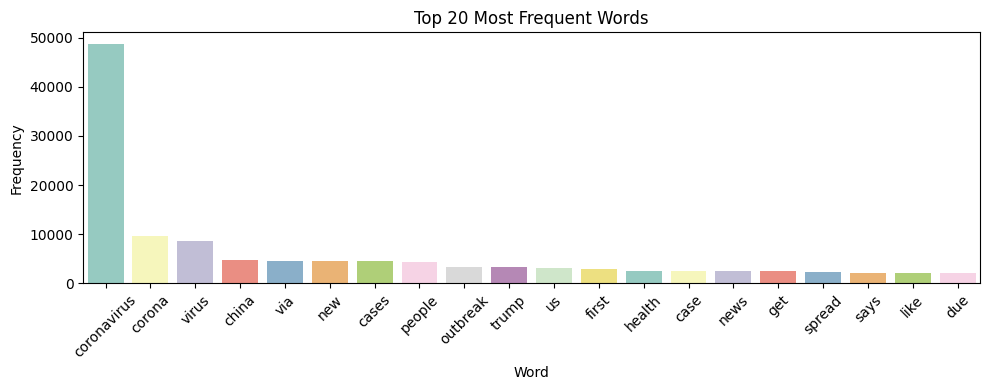

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
all_tokens = ' '.join(df['tweet']).split()
filtered_tokens = [
    token.lower() for token in all_tokens
    if token.isalpha() and token.lower() not in stop_words
]
word_freq = Counter(filtered_tokens)
common_words = word_freq.most_common(20)
words, freqs = zip(*common_words)

plt.figure(figsize=(10,4))
sns.barplot(x=list(words), y=list(freqs), palette='Set3')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight:

After removing “the”, “in”, “to”, etc., the top words are “coronavirus”, “#coronavirus”, “corona”, and “virus”, confirming the dataset’s focus on COVID-19 discussion.

# Statistical Models

## Vader

Vader provides the SentimentIntensityAnalyzer, which is a lexicon and rule-based sentiment analysis tool that does not learn from the data using models such as traditional machine learning approaches. The sentiment lexicon is a list of over 7,500 words and phrases. All of these entries are allocated a valence score, which is a floating-point number between -4 and +4. This range represents how positive or negative a word is. For example, words such as "excited" or "joy" might have scores that sit between +3 and +4. Whereas words with negative connotations, such as "yuck" or "disgusting", will map to negative scores. More neutral words will stay close to 0, while words strongly representing an emotion, be it positive or negative, will skew towards +4 or -4, respectively.

The vader model uses classification threshold of greater than or equal to 0.05 for positive sentiment, less than or equal to -0.05 for negative sentiment and between 0.05 and -0.05 for neutral sentiment (Hutto & Gilbert, 2014). To increase representation, Vadar also has heuristic rules that it adheres to. For example, the inclusion of more exclamation marks implies greater intensity; hence, "hello!!!" is greater than "hello!". It also looks out for capitalisations to also understand amplifications, hence "GOOD" is greater than "good". Vader also looks at emojis, negations of terms, and conjunctions, to name a few, to better understand the text.

Vader is simple to implement and works well out of the box. It performs well on social media-related posts and texts that are short. Making tweets an area where the model is expected to have decent performance.

In [ ]:
sentiment_analyzer = SentimentIntensityAnalyzer()
def get_polarity_score(text):
  score = sentiment_analyzer.polarity_scores(text)['compound']
  if score >= 0.05:
    return 2 #return postivie
  elif score <= -0.05:
    return 0 #returns negative
  else:
    return 1 #returns neutral
vader_preds = test_texts.apply(get_polarity_score)

In [ ]:
print(classification_report(test_labels, vader_preds))

              precision    recall  f1-score   support

           0       0.31      0.64      0.42      1634
           1       0.86      0.43      0.58      6738
           2       0.15      0.55      0.24       628

    accuracy                           0.48      9000
   macro avg       0.44      0.54      0.41      9000
weighted avg       0.71      0.48      0.52      9000



Although Vader shows decent performance, it is clear that there is room for improvement. This is due to the approach's limited ability to handle sarcasm, understand deeper context, and notify domain-specific meanings. The simple rule-based approach has ok performance but, as expected, falls short and leaves room for improvement.

## Textblob

Textblob is very similar to Vader. It also utilises rule and lexicon-based approaches for sentiment analysis. It too has a pre-defined dictionary of words and phrases that it assigns values to, exactly like Vader. Again, the input text, in this case the tweet, is tokenised into words and phrases. Words within the dictionary are positive (greater than 0) when they have a positive connotation, and negative (less than zero) when they have a negative connotation. Neutral words are close to 0, while words with more emotion tend away from 0 in the positive and negative directions, depending on their tone. The tokenised words or phrases are then looked up in the lexicon. The polarity is the average of the scores after the adjustments have been made. The range in this case is -1 to +1, where -1 is very negative, 0 is neutral, and +1 is very positive.

Fundamentally, Vader and Textblob use similar rule and lexicon-based approaches to solve the same problem. As a result of this, we would expect the two approaches to perform similarly.

In [ ]:
def get_text_blob_polarity_score(text):
  text_blob = TextBlob(text)
  score = text_blob.sentiment.polarity
  if score > 0:
    return 2 #positive
  elif score < 0:
    return 0 #negative
  else:
    return 1 #neutral
blob_preds = test_texts.apply(get_polarity_score)

In [ ]:
print(classification_report(test_labels, blob_preds))

              precision    recall  f1-score   support

           0       0.31      0.64      0.42      1634
           1       0.86      0.43      0.58      6738
           2       0.15      0.55      0.24       628

    accuracy                           0.48      9000
   macro avg       0.44      0.54      0.41      9000
weighted avg       0.71      0.48      0.52      9000



Comparing the results from the Vader and the Textblob it is clear that our assumption was correct, as the models perform identically. This was expected as the methods used similar rules and lexicon-based analysis to understand the sentiment of each tweet. This implies that the Textblob approach has the same limitations that the Vader approach had. Namely, it has limited ability to handle sarcasm, understand deeper context, and notify domain-specific meanings. Both the rule-based approaches demonstrated similar performance and leave room for improvement.

# Traditional Machine Learning Models

### Set Up Vectorizer and Prepare the Data
The vectorizer should be set up only once to be used in the different models. This is becauase the vocabulary learnt from the training data will be different for other models if we keep re-setting the vectorizer.

We've used Count Vectorizer, which converts text documents into vectors based on the count of each word in the text document.

In [ ]:
count_vectorizer = CountVectorizer(binary=True)
X_train = count_vectorizer.fit_transform(train_texts)
X_val = count_vectorizer.transform(val_texts)
X_test = count_vectorizer.transform(test_texts)

### Bernoulli Naive Bayes

Bernoulli Naive Bayes is a simple Naive Bayes algorithm which looks at whether a word is present or absent. This makes it very effective for sentiment analysis since it focuses on whether a word indicating a sentiment is present or not rather than focusing on the frequency or count of the word. As as result, we hypothise that Bernoulli Naive Bayes will perfom well with sentiment analysis as it gives more weight to presence of a specific word that indicates sentiment rather than count of the word.

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, train_labels)
y_pred = bnb.predict(X_test)
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.35      0.47      1634
           1       0.80      0.97      0.87      6738
           2       0.50      0.00      0.01       628

    accuracy                           0.79      9000
   macro avg       0.68      0.44      0.45      9000
weighted avg       0.76      0.79      0.74      9000



Based on the results, it seems like our hypothesis does not hold. The Bernoulli Naive Bayes model seems to struggle with identifying positive and negative sentiments, while it seems to perform well at identifying neutral sentiment. This indicates that the model is likely overfitting to the neutral class due to class imbalance. Thus, the Bernoulli Naive Bayes model's focus on whether a word is present or absent seems to be a bit too simple and hence doesn't seem to perform well with COVID-19 sentiment analysis.

### Multinomial Naive Bayes

Multinomial Naive Bayes is also a Naive Bayes algorithm, but unlike the Bernoulli Naive Bayes model, it looks at the frequency of words rather than whether a word is present or not. This also makes it very effective for sentiment analysis, as it can get the overall sentiment of a document based on how many times a sentiment indicating word appears in that document. As a result of this, we hypothesise that the Multinomial Naive Bayes model will perform better than the Binomial Naive Bayes model, as it gives more weight to the frequency of sentiment-indicating words rather than just checking whether it is present or not, which makes the model more effective at classifying the overall sentiment of the document.

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, train_labels)
y_pred = mnb.predict(X_test)
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.46      0.58      1634
           1       0.81      0.97      0.88      6738
           2       0.67      0.04      0.07       628

    accuracy                           0.81      9000
   macro avg       0.75      0.49      0.51      9000
weighted avg       0.80      0.81      0.77      9000



From the results, we can see that the Multinomial Naive Bayes model, performs slightly better than the Bernoulli Naive Bayes model for all three of the classes. While, our hypothesis was partially correct, our Multinomial Naive Bayes model still struggles to correctly classify positive and negative sentiments.

### Logistic Regression

Logistic Regression is a linear model which predicts the probablity of whether an input belongs to one of the sentiment classes. It does this by learning the weigth of each word and as a result it can determine how much do each of the words contribute to the sentiment, while Naive Bayes models assume that the features are independent. Thus, we hypothise that the Logistic Regression model will perform better at sentiment analysis than the Naive Bayes models.

For our Logistic Regression model, we set the hypermarater max_iter = 1000 because the model fails to converge when using the default value (max_iter = 100)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, train_labels)
lr_preds = lr.predict(X_test)
print(classification_report(test_labels, lr_preds))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1634
           1       0.93      0.96      0.94      6738
           2       0.79      0.64      0.71       628

    accuracy                           0.91      9000
   macro avg       0.87      0.81      0.83      9000
weighted avg       0.91      0.91      0.91      9000



From the results, we can clearly see that the Logistic Regression Model outperforms both Bernoulli and Multinomial Naive Bayes models. It seems to handle the class imabalance in our dataset much better than the Naive Bayes models too. Thus our hypothesis was correct.

# Deep Learning Models

### LSTM

LSTM is an enhanced version of the RNN, and it can handle long-term dependencies in sequential data with an extra memory cell and three gates. Because of this characteristic, it can remember information over extended periods and is suitable for NLP tasks.

In [ ]:
torch.manual_seed(42)

Here are the online meterial we learnt to implement the LSTM model:

https://wandb.ai/sauravmaheshkar/LSTM-PyTorch/reports/Using-LSTM-in-PyTorch-A-Tutorial-With-Examples--VmlldzoxMDA2NTA5
https://docs.pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

In [ ]:
class TwitterSentiLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hid_size):
        super().__init__()
        self.embedding_words = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hid_size, batch_first=True)
        self.fc = nn.Linear(hid_size, 3)

    def forward(self, x):
        embedded = self.embedding_words(x)
        _, (h_n, _) = self.lstm(embedded)
        return self.fc(h_n[-1])

In [ ]:
# convert token to id
def token_to_id(tokens, token_id_dict):
    return [token_id_dict.get(token, token_id_dict["<UNK>"]) for token in tokens]

# process and get padded input
def get_input(texts, token_id_dict):
    tokens = texts.apply(lambda text: basic_tokenizer2(text))
    input_ids = tokens.apply(lambda tokens: token_to_id(tokens, token_id_dict))
    sequences = list(input_ids.apply(lambda x: torch.tensor(x, dtype=torch.long)))
    padded_input = pad_sequence(sequences, batch_first=True)
    return padded_input

# convert labels to tensor
def get_labels(labels):
    labels = torch.tensor(labels.tolist(), dtype=torch.long)
    return labels

In [ ]:
# set up the token dictionary using the training text
token_id_dict = {"<PAD>": 0, "<UNK>": 1}
for text in train_texts:
    for token in basic_tokenizer2(text):
        if token not in token_id_dict:
            token_id_dict[token] = len(token_id_dict)

In [ ]:
# model structure paramater and some hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 16
embedding_dim = 40
hid_size = 64
epochs_num = 20

In [ ]:
# prepare the dataloaders for training, evulation and test
train_input = get_input(train_texts, token_id_dict)
test_input = get_input(test_texts, token_id_dict)
val_input = get_input(val_texts, token_id_dict)

train_dataset = torch.utils.data.TensorDataset(train_input, get_labels(train_labels))
test_dataset = torch.utils.data.TensorDataset(test_input, get_labels(test_labels))
val_dataset = torch.utils.data.TensorDataset(val_input, get_labels(val_labels))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size, shuffle=False)

In [ ]:
lstm_model = TwitterSentiLSTM(len(token_id_dict), embedding_dim, hid_size).to(device)
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001, weight_decay=0.00005)
criterion = nn.CrossEntropyLoss()

# training model function, pass model as the parameter
def train_lstm(lstm_model):
  for epoch in range(epochs_num):
      lstm_model.train()
      total = 0
      total_loss = 0
      total_correct = 0

      for batch_inputs, batch_labels in train_dataloader:
          batch_inputs = batch_inputs.to(device)
          batch_labels = batch_labels.to(device)

          optimizer.zero_grad()
          outputs = lstm_model(batch_inputs)
          loss = criterion(outputs, batch_labels)
          loss.backward()
          optimizer.step()

          total_loss += loss.item()
          predicted = torch.argmax(outputs, dim=1)
          total_correct += (predicted == batch_labels).sum().item()
          total += batch_labels.size(0)

      avg_loss = total_loss / len(train_dataloader)
      accuracy = total_correct / total
      print(f"Epoch {epoch + 1}, training loss: {avg_loss:.4f}, training accuracy: {accuracy:.4f}", end='')

      # eval during training
      lstm_model.eval()
      total = 0
      total_correct = 0
      with torch.no_grad():
          for batch_inputs, batch_labels in val_dataloader:
              batch_inputs = batch_inputs.to(device)
              batch_labels = batch_labels.to(device)

              outputs = lstm_model(batch_inputs)
              _, predicted = torch.max(outputs, 1)
              total += batch_labels.size(0)
              total_correct += (predicted == batch_labels).sum().item()

      accuracy = total_correct / total
      print(f" Evaluation accuracy: {accuracy:.4f}")

In [ ]:
# train the best result model
train_lstm(lstm_model)

Epoch 1, training loss: 0.5770, training accuracy: 0.7922 Evaluation accuracy: 0.8609
Epoch 2, training loss: 0.3303, training accuracy: 0.8817 Evaluation accuracy: 0.8962
Epoch 3, training loss: 0.2437, training accuracy: 0.9138 Evaluation accuracy: 0.9088
Epoch 4, training loss: 0.1858, training accuracy: 0.9364 Evaluation accuracy: 0.9190
Epoch 5, training loss: 0.1566, training accuracy: 0.9461 Evaluation accuracy: 0.9193
Epoch 6, training loss: 0.1342, training accuracy: 0.9548 Evaluation accuracy: 0.9285
Epoch 7, training loss: 0.1113, training accuracy: 0.9639 Evaluation accuracy: 0.9342
Epoch 8, training loss: 0.0926, training accuracy: 0.9703 Evaluation accuracy: 0.9304
Epoch 9, training loss: 0.0742, training accuracy: 0.9760 Evaluation accuracy: 0.9354
Epoch 10, training loss: 0.0645, training accuracy: 0.9797 Evaluation accuracy: 0.9393
Epoch 11, training loss: 0.0582, training accuracy: 0.9811 Evaluation accuracy: 0.9399
Epoch 12, training loss: 0.0527, training accuracy: 

### Best test result for LSTM:

In [ ]:
# test model function, pass model as the parameter, return predicted result for future usage
def test_lstm(lstm_model):
  lstm_model.eval()
  total = 0
  total_correct = 0
  all_preds = []
  all_labels = []
  with torch.no_grad():
      for batch_inputs, batch_labels in test_dataloader:
          batch_inputs = batch_inputs.to(device)
          batch_labels = batch_labels.to(device)

          outputs = lstm_model(batch_inputs)
          predicted = torch.argmax(outputs, dim=1)
          total_correct += (predicted == batch_labels).sum().item()
          total += batch_labels.size(0)
          all_preds.extend(predicted.cpu().numpy())
          all_labels.extend(batch_labels.cpu().numpy())

  accuracy = total_correct / total
  print(f"Test accuracy: {accuracy:.4f}\n")
  target_names = ['neg', 'neu', 'pos']
  print("LSTM Classification Report:")
  print(classification_report(all_labels, all_preds, target_names=target_names, digits=4))
  return all_preds

In [ ]:
# test the best lstm model, save predicted result for error analysis
best_lstm_all_preds = test_lstm(lstm_model)

Test accuracy: 0.9436

LSTM Classification Report:
              precision    recall  f1-score   support

         neg     0.8963    0.8941    0.8952      1634
         neu     0.9595    0.9669    0.9632      6738
         pos     0.8897    0.8217    0.8543       628

    accuracy                         0.9436      9000
   macro avg     0.9152    0.8942    0.9042      9000
weighted avg     0.9432    0.9436    0.9433      9000



### Try other hyperparameters and model structure to compare with the best result for LSTM model
Using batch size 64 and do not set weight decay for adam optimizer(default is 0) - these hyperparameters have the worse result

In [ ]:
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
test_lstm_model = TwitterSentiLSTM(len(token_id_dict), embedding_dim, hid_size).to(device)
optimizer = optim.Adam(test_lstm_model.parameters(), lr=0.001)
train_lstm(test_lstm_model)
_ = test_lstm(test_lstm_model)

Epoch 1, training loss: 0.6787, training accuracy: 0.7581 Evaluation accuracy: 0.7991
Epoch 2, training loss: 0.4941, training accuracy: 0.8267 Evaluation accuracy: 0.8521
Epoch 3, training loss: 0.3577, training accuracy: 0.8741 Evaluation accuracy: 0.8741
Epoch 4, training loss: 0.2763, training accuracy: 0.9027 Evaluation accuracy: 0.8864
Epoch 5, training loss: 0.2131, training accuracy: 0.9256 Evaluation accuracy: 0.8885
Epoch 6, training loss: 0.1637, training accuracy: 0.9435 Evaluation accuracy: 0.8863
Epoch 7, training loss: 0.1238, training accuracy: 0.9593 Evaluation accuracy: 0.8879
Epoch 8, training loss: 0.0943, training accuracy: 0.9705 Evaluation accuracy: 0.8819
Epoch 9, training loss: 0.0715, training accuracy: 0.9783 Evaluation accuracy: 0.8869
Epoch 10, training loss: 0.0534, training accuracy: 0.9843 Evaluation accuracy: 0.8786
Epoch 11, training loss: 0.0404, training accuracy: 0.9887 Evaluation accuracy: 0.8769
Epoch 12, training loss: 0.0304, training accuracy: 

### LSTM Model Summary

### Model description
LSTM is an enhanced version of the RNN, and it can handle long-term dependencies in sequential data with an extra memory cell and three gates. Because of this characteristic, it can remember information over extended periods and is suitable for NLP tasks.

### The current model structure:

Embedding Dimension | Hidden Units | Output
---------------------|--------------|--------
40 | 64 | 3

### Model inputs
Before training the model, we make the input as the same length sequence (ids of works), first we use the train_texts to calculate the dictionary of all word we train. So, for the evaluation and test texts, when we covert it to tokens, the unknown words (not in the dictionary) will be converted to <UNK> token in the input sequence.

### Final Hyperparameter
Optimizer | Batch Size | Learning Rate | Weight Decay | Epochs
----------|----------|--------------|------------------|--------
Adam | 16 | 0.001 | 0.00005 | 20

### Hyperparameter selection
Batch Size | Weight Decay | Precision | Recall | F1 | Accuracy
----------|----------|--------------|-------------|--------|-------
64 | 0 | 88% | 88% | 88% | 88%
16 | 0.00005 | 94% | 94% | 94% | 94%

The small batch size makes the model more generalized and improves the accuracy, and the weight decay makes the weight stay small which improves the overfitting issue.

### Tokenizer selection
Tokenizer functions:

basic_tokenizer - split using white spaces and punctuation

basic_tokenizer2 - simple split using white space, including punctuation

Tokenizer | Weight Decay | Embedding Dim | Hidden Uinit | Precision | Recall | F1 | Accuracy
----------|----------|--------------|------------------|--------|----|---|---
basic_tokenizer | 0.00005 | 40 | 64 | 56% | 75% | 64% | 75%
basic_tokenizer | 0 | 128 | 128 | 92% | 92% | 92% | 92%
basic_tokenizer2| 0.00005 | 40 | 64 | 94% | 94% | 94% | 94%

When we use the basic_tokenizer2, the test accureacy is around 94% as the above. However, if we change it to use basic_tokenizer, in 20 epochs, even the training accuracy will keep around 75% and didn't improve. We did some tests and found, if we change the network structure as the aboved table it will get better, the test accuracy can get around 92%, it is not as good as using basic_tokenizer2 or even using a bigger network. we think this is because basic_tokenizer remove the punctuations as well, so "It's" will become two tokens "It" and "s", but basic_tokenizer2 will still be "It's", it could be this extra information make the model works better even using smaller embedding dim and hidden unit.


### GRU

The GRU is the final deep learning model that was explored. Like the LSTM it is also an RNN network that utilises gates to learn and was created to solve the vanishing gradient problem. GRU’s, however, are a simpler alternative to the LSTM and have fewer parameters while having similar performance. This means that the model offers efficient training and a faster inference time, which is the reason why the team wanted to investigate its performance.  

In [ ]:
counter = Counter(token for sentence in all_tokens for token in sentence)
vocab_list = ["<pad>", "<unk>"] + [token for token, _ in counter.items()]
vocab = {token: idx for idx, token in enumerate(vocab_list)}
pad_idx = vocab["<pad>"]
unk_idx = vocab["<unk>"]

In [ ]:
class TweetDataset(TorchDataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = torch.tensor([vocab.get(tok, unk_idx) for tok in basic_tokenizer(self.texts[idx])])
        return tokens, torch.tensor(self.labels[idx])

In [ ]:
def collate_batch(batch):
    text_list, label_list = zip(*batch)
    padded_texts = pad_sequence(text_list, batch_first=True, padding_value=pad_idx)
    return padded_texts, torch.tensor(label_list)

In [ ]:
train_data = TweetDataset(train_texts.tolist(), train_labels.tolist())
val_data = TweetDataset(val_texts.tolist(), val_labels.tolist())
test_data = TweetDataset(test_texts.tolist(), test_labels.tolist())

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, collate_fn=collate_batch)
val_loader = DataLoader(val_data, batch_size=64, collate_fn=collate_batch)
test_loader = DataLoader(test_data, batch_size=64, collate_fn=collate_batch)

In [ ]:
# GRU model
class GRUSentiment(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.gru = nn.GRU(embed_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        _, hidden = self.gru(embedded)
        return self.fc(hidden[-1])

In [ ]:
# Grid Search Parameters
param_grid = {
    "embed_dim": [50, 100],
    "hidden_dim": [64, 128],
    "learning_rate": [0.01, 0.001],
    "num_layers": [1, 2, 3],
}

param_names = list(param_grid.keys())
param_combinations = list(product(*param_grid.values()))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
output_dim = 3

best_acc = 0.0
best_params = None
results = []

# Grid search loop
for values in param_combinations:
    params = dict(zip(param_names, values))
    print(f"\nTesting: {params}")

    model = GRUSentiment(
        len(vocab),
        embed_dim=params["embed_dim"],
        hidden_dim=params["hidden_dim"],
        output_dim=output_dim,
        num_layers=params["num_layers"],
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=params["learning_rate"])
    criterion = nn.CrossEntropyLoss()

    # Train for a few epochs
    for epoch in range(5):
        model.train()
        total_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")

    # Evaluate on validation set
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            preds = model(x_batch).argmax(dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    acc = correct / total
    results.append((params, acc))
    print(f"Val Accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_params = params

print(f"\nBest Hyperparameters:{best_params}")
print(f"Validation Accuracy: {best_acc:.4f}")


Testing: {'embed_dim': 50, 'hidden_dim': 64, 'learning_rate': 0.01, 'num_layers': 1}
Epoch 1, Loss: 760.3883
Epoch 2, Loss: 461.1598
Epoch 3, Loss: 410.7002
Epoch 4, Loss: 393.2974
Epoch 5, Loss: 392.9919
Val Accuracy: 0.9119

Testing: {'embed_dim': 50, 'hidden_dim': 64, 'learning_rate': 0.01, 'num_layers': 2}
Epoch 1, Loss: 817.6964
Epoch 2, Loss: 562.8942
Epoch 3, Loss: 513.0667
Epoch 4, Loss: 477.8570
Epoch 5, Loss: 472.2412
Val Accuracy: 0.9069

Testing: {'embed_dim': 50, 'hidden_dim': 64, 'learning_rate': 0.01, 'num_layers': 3}
Epoch 1, Loss: 805.1690
Epoch 2, Loss: 586.3217
Epoch 3, Loss: 612.4342
Epoch 4, Loss: 631.7858
Epoch 5, Loss: 709.7046
Val Accuracy: 0.8593

Testing: {'embed_dim': 50, 'hidden_dim': 64, 'learning_rate': 0.001, 'num_layers': 1}
Epoch 1, Loss: 1130.2054
Epoch 2, Loss: 613.7909
Epoch 3, Loss: 433.5585
Epoch 4, Loss: 315.2133
Epoch 5, Loss: 224.4897
Val Accuracy: 0.9163

Testing: {'embed_dim': 50, 'hidden_dim': 64, 'learning_rate': 0.001, 'num_layers': 2}
Epo

In [ ]:
# train GRU model with optimal hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_gru = GRUSentiment(len(vocab), 100, 128, 3, 3).to(device)

optimizer = torch.optim.Adam(model_gru.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    model_gru.train()
    total_loss = 0
    for x_batch, y_batch in tqdm(train_loader):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model_gru(x_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

100%|██████████| 1969/1969 [00:13<00:00, 147.36it/s]


Epoch 1, Loss: 936.7895


100%|██████████| 1969/1969 [00:13<00:00, 145.70it/s]


Epoch 2, Loss: 489.2107


100%|██████████| 1969/1969 [00:12<00:00, 153.09it/s]


Epoch 3, Loss: 313.6741


100%|██████████| 1969/1969 [00:12<00:00, 153.89it/s]


Epoch 4, Loss: 187.0041


100%|██████████| 1969/1969 [00:13<00:00, 145.85it/s]


Epoch 5, Loss: 110.3712


100%|██████████| 1969/1969 [00:13<00:00, 145.47it/s]


Epoch 6, Loss: 66.5924


100%|██████████| 1969/1969 [00:13<00:00, 149.87it/s]


Epoch 7, Loss: 44.9688


100%|██████████| 1969/1969 [00:14<00:00, 138.55it/s]


Epoch 8, Loss: 33.6512


100%|██████████| 1969/1969 [00:13<00:00, 141.11it/s]


Epoch 9, Loss: 28.6121


100%|██████████| 1969/1969 [00:13<00:00, 147.57it/s]


Epoch 10, Loss: 23.4857


100%|██████████| 1969/1969 [00:14<00:00, 139.78it/s]


Epoch 11, Loss: 19.7867


100%|██████████| 1969/1969 [00:13<00:00, 149.31it/s]


Epoch 12, Loss: 20.3605


100%|██████████| 1969/1969 [00:13<00:00, 144.48it/s]


Epoch 13, Loss: 15.2535


100%|██████████| 1969/1969 [00:13<00:00, 142.62it/s]


Epoch 14, Loss: 12.9843


100%|██████████| 1969/1969 [00:13<00:00, 147.05it/s]


Epoch 15, Loss: 12.9891


100%|██████████| 1969/1969 [00:13<00:00, 140.95it/s]


Epoch 16, Loss: 14.6126


100%|██████████| 1969/1969 [00:14<00:00, 140.34it/s]


Epoch 17, Loss: 13.1593


100%|██████████| 1969/1969 [00:14<00:00, 136.96it/s]


Epoch 18, Loss: 8.8441


100%|██████████| 1969/1969 [00:13<00:00, 141.19it/s]


Epoch 19, Loss: 13.4412


100%|██████████| 1969/1969 [00:13<00:00, 147.28it/s]

Epoch 20, Loss: 10.2138


In [ ]:
# eval GRU on train set
total = 0
correct = 0
y_true = []
y_pred = []
with torch.no_grad():
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        preds = model_gru(x_batch).argmax(dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
print(f"GRU Train Accuracy: {correct / total:.4f}")

# eval GRU on test set
total = 0
correct = 0
y_true = []
y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        preds = model_gru(x_batch).argmax(dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
print(f"GRU Test Accuracy: {correct / total:.4f}")

GRU Train Accuracy: 0.9993
GRU Test Accuracy: 0.9228


In [ ]:
# metrics for GRU
print("GRU Classification Report (Test):")
print(classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"]))

GRU Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1634
     Neutral       0.95      0.95      0.95      6738
    Positive       0.78      0.75      0.77       628

    accuracy                           0.92      9000
   macro avg       0.87      0.86      0.86      9000
weighted avg       0.92      0.92      0.92      9000



The GRU managed to attain 92% across the board for all four metrics that are being evaluated which implies that the model was able to learn the sentiment task well fully understanding the sarcasm, temporal differences, and overall context of the tweets. A grid search was performed to determine the optimised hyper-parameters for the model. The grid search yielded the following, embedding dimension 100, hidden dimension 128, learning rate 0.001, number of layers 3. The optimal model was trained on 20 epochs.

# Error Analysis

To better understand where deep learning models outperform traditional machine learning and rules based models in sentiment classification, we performed an error analysis comparing a Rule-based, Logistic Regression (LR) model and an LSTM-based deep learning model.

Representative tweets were examined to compare the predictions of different models against the true sentiment labels. The results show that the LSTM model demonstrates a superior ability to capture long-range contextual dependencies and implicit connotations, leading to more contextually appropriate predictions. In contrast, Rule-Based Vader and Logistic Regression model primarily rely on local word neighborhoods and fail to effectively link the beginning and end of sequences, resulting in misclassifications in cases involving nuanced sentiment or figurative language.

In [ ]:
lstm_preds = best_lstm_all_preds
for i in range(100):
  if test_labels.iloc[i] == lstm_preds[i] and test_labels.iloc[i] != lr_preds[i] and test_labels.iloc[i] != vader_preds.iloc[i]:
    print(test_texts.iloc[i], test_labels.iloc[i], vader_preds.iloc[i], lr_preds[i], lstm_preds[i])

when i said i wanted to die,, i didnt mean to die from coronavirus lmao no lawd ive suffered enuf plz  1 2 0 1
even a mild case of covid-19 is extremely serious (might even include pneumonia). the word mild is very misleading.‚ä¶  1 0 0 1
february market outlook: coronavirus, d.c. proceedings, earnings season could mean volatility‚ä¶  0 1 1 0
oh great, two vancouver school are closed because there are kids with presumptive positive cases of coronavirus

fuck me 1 2 0 1


# Results

The results show clear performance differences across model types and indicate that deep learning approaches outperform traditional and rule-based methods in capturing complex semantic cues. This can be attributed to the deep learning model's ability to learn long term context and remember it. The gates within the GRU and LSTM models allow them to remember the important information while disregarding the less substantial terms. This in turn results in both the models learning the social cues, temporal differences, sarcasm, and context within the tweets to achieve really good results at determining the sentiment. The LSTM outperforms all the other models and is clearly the best performing model.

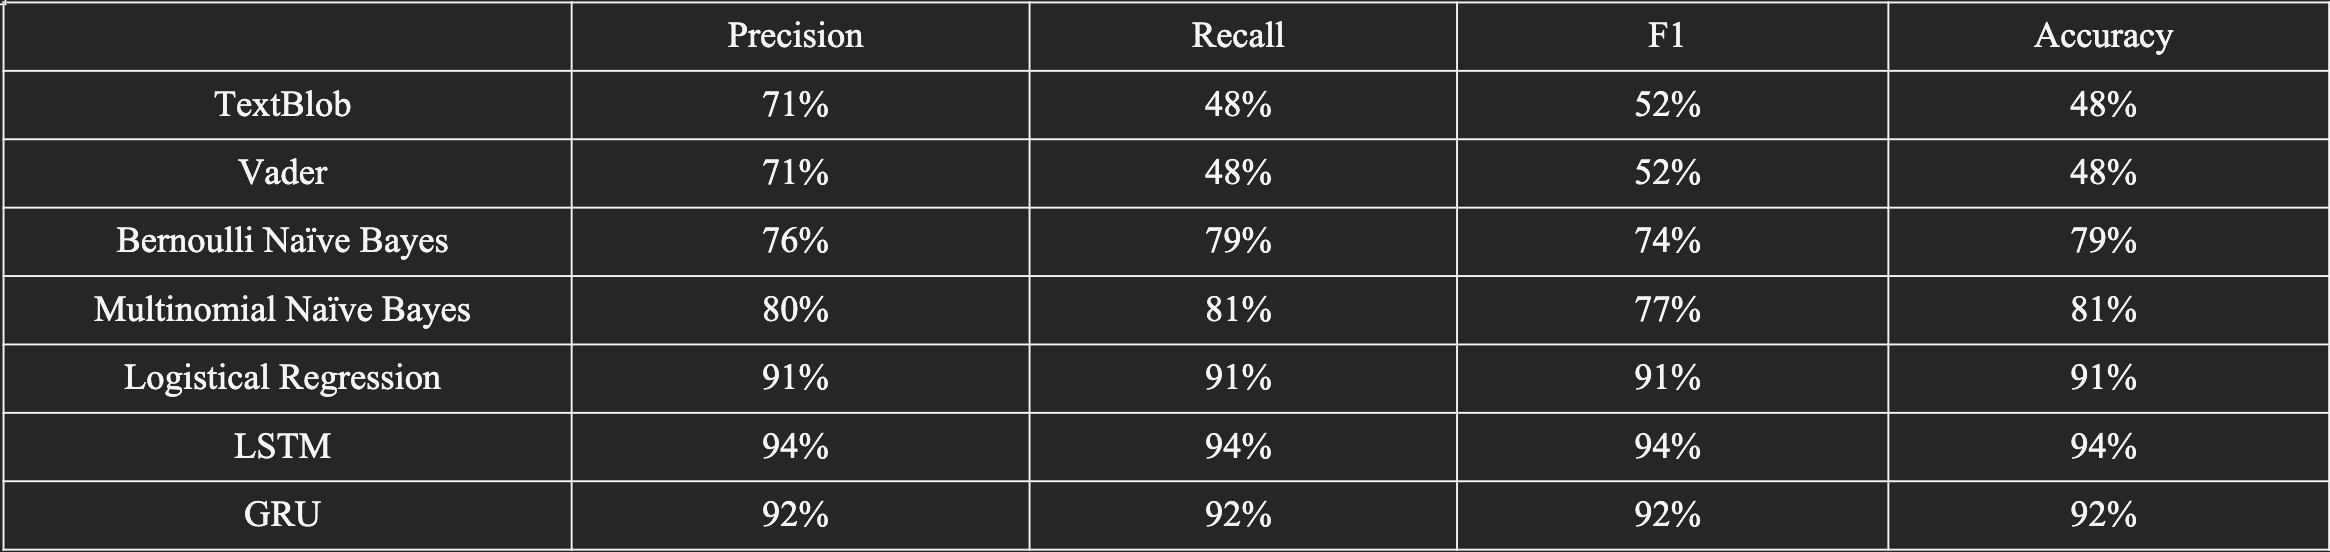

# Discussion

This project focused on sentiment analysis towards COVID-19-related tweets, aiming to evaluate the performance of statistical models, machine learning models, and deep learning models. The study demonstrated that while statistical models such as TextBlob and VADER provide fast and interpretable sentiment analysis without training, their performance on informal, imbalanced tweets is limited. Machine learning models significantly improve their classification accuracy by learning feature weights from the dataset. And deep learning models outperform all other methods, leveraging sequential modeling to capture complex linguistic patterns and sentiment nuances. The deep learning models are also capable of leveraging their gate structure to understand the tweets and the underlying context, sarcasm, and dependencies.

Due to the above, the recommended model to use for sentiment analysis of COVID-19 tweets is an LSTM. Being able to choose what information within the sequence to remember and what to forget serves as a major advantage in learning the overall context of tweets. The model is also quick to train and easy to evaluate. A limitation of the LSTM approach is that implementing the proposed model might be challenging for individuals who are not very technical. If used in a professional setting the models' complicated nature makes explainability more difficult for non-technical stakeholders. If looking to implement, these are limitations that should be considered for the use case. To achieve greater uplift, future research could explore transformer technologies to assess their impact on sentiment analysis.

# Approach 2: Embeddings

For the second approach we will analyse the how different text embedding strategies affect the performance of sentiment analysis. We will use Logistic regression model with Count Vectorizer as the baseline model and compare the effects of TF-IDF, Word2Vec and Glove embeddings to it. The reason for why we are using logistic regression model is because there are many companies and stakeholders who would like to perform sentiment analysis of covid 19 tweets but don’t want to or have the computational resources to run large deep learning models. For such stakeholders, we would like to investigate how much of an uplift can be achieved by using dense word embeddings along with a light machine learning model like logistic regression.

## TF-IDF

Is a frequency based embedding that creates vector representation of words based on the  measures importance of a word in corpus. It calculates the importance of the word in the corpus based on its fruequency and scales it inversely by its frequency across the corpus.

In [ ]:
tf_idf_model  = TfidfVectorizer(tokenizer=basic_tokenizer)
tf_idf_vector = tf_idf_model.fit_transform(train_texts)

lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(tf_idf_vector, train_labels)
test_vector = tf_idf_model.transform(test_texts)
predictions = lr_model.predict(test_vector)
print(classification_report(test_labels, predictions))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.69      0.76      1634
           1       0.88      0.96      0.92      6738
           2       0.76      0.40      0.52       628

    accuracy                           0.87      9000
   macro avg       0.83      0.68      0.74      9000
weighted avg       0.87      0.87      0.86      9000



## Word2Vec

Is a neural network-based word embedding method that learns dense vector representations for words based on their context in the corpus. We'll be using the Gensim library's Word2Vec model to create our embedding model.

Learnt to implement Word2Vec from: https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/

In [ ]:
sentences = []
for sentence in train_texts:
  sentences.append(sentence.split())

### Experimentation for optimal vector size

I experimented with different vector sizes to find an optimal vector size for the word2vec vector representations. The code below trains Word2Vec model with different vector sizes and then creates word embeddings to be used by the logistic regression for classification. We then compare the accuracy score for each vector size to determine the optimal vector size.

In [ ]:
vector_size = [100, 300, 500, 1000, 1500]
accuracy_results = []
def vectorize(sentence, model):
    words = sentence.split()
    vectors = []
    for word in words:
      if word in model.wv:
        vectors.append(model.wv[word])
    if vectors:
      return np.mean(vectors, axis=0)
    else:
      return np.zeros(model.vector_size)

for size in vector_size:
  model = Word2Vec(sentences, vector_size=size, window=5, min_count=1, workers=4, seed=42)
  X_train_vectors = []
  for sentence in train_texts:
    X_train_vectors.append(vectorize(sentence, model))

  X_test_vectors = []
  for sentence in test_texts:
    X_test_vectors.append(vectorize(sentence, model))

  train_vectors = np.array(X_train_vectors)
  test_vectors = np.array(X_test_vectors)

  lr_with_embeddings = LogisticRegression(max_iter = 1000)
  lr_with_embeddings.fit(train_vectors, train_labels)

  y_pred = lr_with_embeddings.predict(test_vectors)
  accuracy = accuracy_score(test_labels, y_pred)
  accuracy_results.append(accuracy)
  print(f"Vector size: {size}, Accuracy: {accuracy}")

Vector size: 100, Accuracy: 0.7534444444444445
Vector size: 300, Accuracy: 0.7555555555555555
Vector size: 500, Accuracy: 0.753
Vector size: 1000, Accuracy: 0.7534444444444445
Vector size: 1500, Accuracy: 0.7525555555555555


Based on the results, it seems like vector size of 300 provides the best accuracy of 75.5%. However, the difference between the accurary score across the different vector size is minimal, so increasing the vector size beyond 300 does not provide any uplift in performance but would consume more computational resources. Thus, we'll chose a vector size of 300 for our Word2Vec Model.

### Word2Vec with optimal vector size

We'll use the optimal vector size of 300 now to create word embedding using our Word2Vec model. We'll then evaluate the performance of our logistic regression model along with these embeddings using sklearn's classification report.

In [ ]:
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4, seed=42)

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    vectors = []
    for word in words:
      if word in model.wv:
        vectors.append(model.wv[word])
    if vectors:
      return np.mean(vectors, axis=0)
    else:
      return np.zeros(model.vector_size)

X_train_vectors = []
for sentence in train_texts:
  X_train_vectors.append(vectorize(sentence))

X_test_vectors = []
for sentence in test_texts:
  X_test_vectors.append(vectorize(sentence))

train_vectors = np.array(X_train_vectors)
test_vectors = np.array(X_test_vectors)

In [ ]:
lr_with_embeddings = LogisticRegression(max_iter = 1000)
lr_with_embeddings.fit(train_vectors, train_labels)
y_pred = lr_with_embeddings.predict(test_vectors)

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.07      0.13      1634
           1       0.76      0.98      0.86      6738
           2       0.45      0.08      0.13       628

    accuracy                           0.75      9000
   macro avg       0.60      0.38      0.37      9000
weighted avg       0.71      0.75      0.68      9000



### GloVe

Is an extension of Word2Vec model and produces dense word embeddings by not only looking at the context of word but also the cooccurrence of word in the corpus. We'll be creating our Glove model using pretrained Glove embeddings. We'll be specifically using Glove Twitter 27B 200d embeddings, which are pretrained on 27 billion tokens from 2 billion tweets and will have a vector size of 200 for the word embeddings.

Learnt to implement Glove from: https://spotintelligence.com/2023/11/27/glove-embedding/

In [ ]:
from gensim.models import KeyedVectors

glove_txt = '/content/glove.twitter.27B.200d.txt'
glove_model = KeyedVectors.load_word2vec_format(
    glove_txt,
    binary=False,
    no_header=True,
    unicode_errors='ignore'
)

print(glove_model['twitter'][:5])
print(len(glove_model.key_to_index))

[ 0.10433   0.39882  -0.69542  -0.50984   0.066959]
1193514


Convert sentence into word embeddings using GloVe.

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    vectors = []
    for word in words:
        if word in glove_model:
            vectors.append(glove_model[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

X_train_vectors = []
for sentence in train_texts:
    X_train_vectors.append(vectorize(sentence))

X_test_vectors = []
for sentence in test_texts:
    X_test_vectors.append(vectorize(sentence))

train_vectors = np.array(X_train_vectors)
test_vectors = np.array(X_test_vectors)

Train logistic regression on these embeddings and evaluate its performance.

In [ ]:
lr_with_embeddings = LogisticRegression(max_iter = 1000)
lr_with_embeddings.fit(train_vectors, train_labels)
y_pred = lr_with_embeddings.predict(test_vectors)

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.23      0.33      1634
           1       0.78      0.96      0.86      6738
           2       0.47      0.11      0.18       628

    accuracy                           0.77      9000
   macro avg       0.62      0.43      0.46      9000
weighted avg       0.73      0.77      0.72      9000



# Results

The results show that embedding strategy has a significant impact on machine learning models’ performance with the simple frequency-based embeddings such as Count Vectorizer and TF-IDF Vectorizer outperforming the dense neural network-based word embeddings for our specific dataset. Among the tested models, Count Vectorizer delivers the highest precision, recall, F1 and accuracy, while the Word2Vec embedding performed the worst across all the metrics. This could be because our dense word embedding models might be overfitting to the training dataset and not generalizing well with the test dataset. Another reason could also be because of the limited and short tweet length which would make it difficult for our word embedding models to better understand the context given the short and limited tweet length.

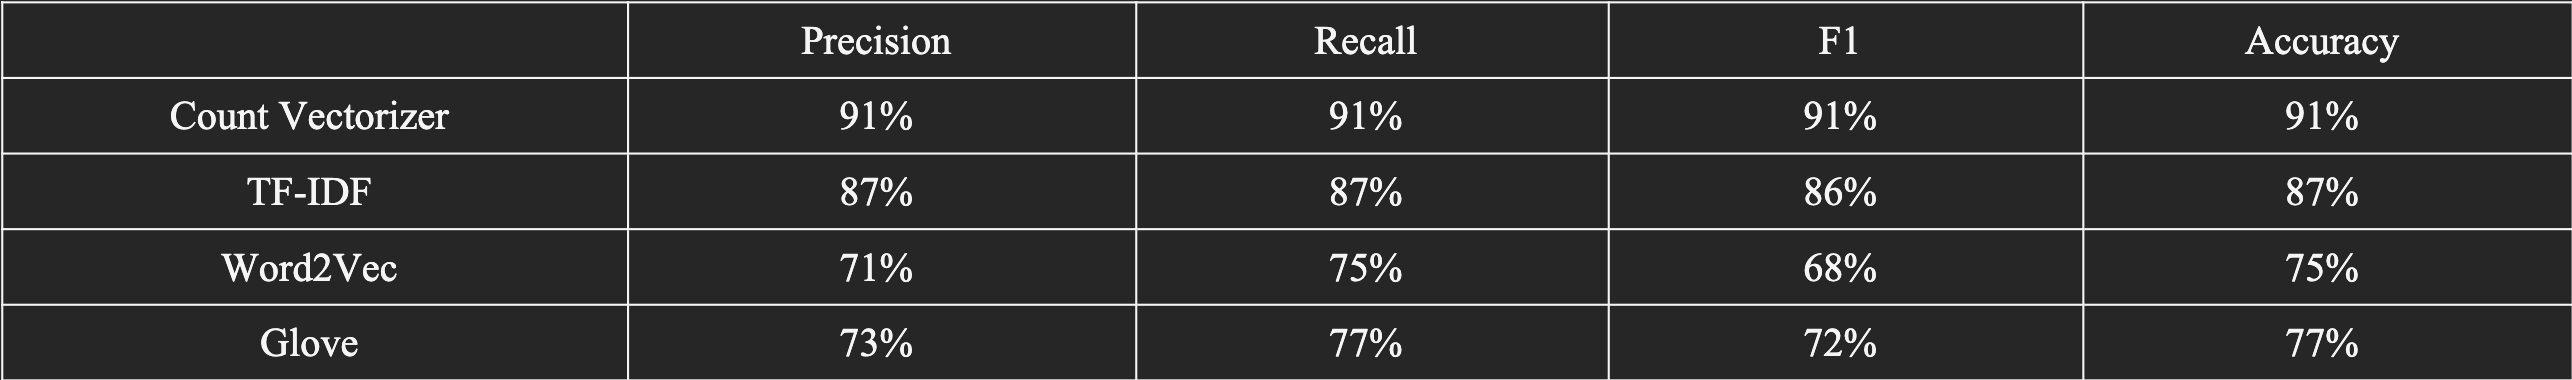

# Discussion

This project also explored how different word embedding techniques influence sentiment classification performance. The study demonstrated that stakeholders could achieve a high level of performance with sentiment analysis of COVID-19 related tweets using a simple logistic regression model with a simple frequency-based embedding like Count Vectorizer. While such approaches may not match the performance of large deep learning models, they offer a practical balance between computational resources and performance which can be useful particularly for stakeholders who want to conduct sentiment analysis on COVID-19 related tweets but don’t have the computational resources to run large deep learning models. However, using large deep learning models such as LSTM still provides a significant uplift in performance with regards to sentiment analysis and deep learning models are essential if we want the best performance and highest accuracy. Future research could investigate how the different embedding techniques affect the performance of deep learning models such as LSTM.